<img src="images/RIINBRE-Logo.jpg" width="400" height="400"><img src="images/MIC_Logo.png" width="600" height="600">

# Analysis of Biomedical Data for Biomarker Discovery
## Submodule 6: Linear and Logistic Regression for Comparison of Quantitative Biomarkers
### Dr. Christopher L. Hemme
### Director, [RI-INBRE Molecular Informatics Core](https://web.uri.edu/riinbre/mic/)
### The University of Rhode Island College of Pharmacy
Last Updated: March 22, 2023

---

## Introduction

In Chapter 2 we introduced the mouse renal ischaemia-reperfusion injury (IRI) model.  In this chapter, we will compare two common biomarkers, serum creatinine (SCr) and blood urea nitrogen (BUN) using linear and logistic regression.  Each of these biomarkers are well-established indicators of kidney injury with relatively well-defined cutoffs between healthy and injured states.  By examining how two well-established biomarkers correlate with each other, you should come away from this chapter with an understanding of how an unknown biomarker could be evaluated compared to an established biomarker.  For this chapter, we will treat SCr as our "standard" biomarker and will use it as the reference to assess the biomarker properties of BUN.

<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b> Blue boxes will indicate helpful tips.</div>

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> Used for interesting asides or notes.
</div>

<div class="alert alert-block alert-success">
<b>&#9997; Reference:</b> This box indicates a reference for an attached figure or table.
</div>

<div class="alert alert-block alert-danger">
<b>&#128721; Caution:</b> A red box indicates potential hazards or pitfalls you may encounter.
</div>

---

## Evaluating Biomarkers Using Linear Regression

A common situation in biomedical research is determining the correlation or relationship between two quantitative variables. Linear regression is a statistical method that allows you to predict a quantitative response. 


First, the installation of packages.  Reminder that this may take a few minutes.

In [1]:
packages <- c("glm2", "fastDummies", "pROC", "ggpubr")
installed_packages <- packages %in% rownames(installed.packages())
if (any(installed_packages == FALSE)) {install.packages(packages[!installed_packages])}

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [2]:
require('ggpubr')
require('tidyverse')
require('dplyr')
require('magrittr')
require('glm2')
require('pROC')

Loading required package: ggpubr

Loading required package: ggplot2

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.1     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: glm2

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats

In [3]:
# factoextra visualizes results of multivariate data analysis
# This must be done after the require() statements in order to avoid overwriting certain packages
if(!require(devtools)) install.packages("devtools")
devtools::install_github("kassambara/factoextra")
library("factoextra")

Loading required package: devtools

Loading required package: usethis

Skipping install of 'factoextra' from a github remote, the SHA1 (1689fc74) has not changed since last install.
  Use `force = TRUE` to force installation

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



Now we load the experimental object from the last chapter which should be saved as "/home/jupyter/biomarkers/data/Saved_Data/exp_obj.rds".  If it is not, go back to Submodule 5 and save the object or recreate it here.

In [4]:
exp_obj <- readRDS(file = "data/Saved_Data/exp_obj.rds")

<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b>
    <br>SCr = Serum Creatinine (mg/dL)
    <br>BUN = Blood Urea Nitrogen (mg/dL)
</div>

A benefit of using an experimental object is that we can use it to store the raw, unmodified data and then copy that data to another variable for actual manipulation.  Maintaining your raw data in a read-only format (with multiple backups) is good data science practice in general because it ensures that your original data will not be destroyed by the manipulations, which in turn promotes reproducibility.  For the sake of simplicity, we're going to join the biomarker and metadata into a single data frame called <i>biomarker_df</i> using <i>dplyr</i>'s <i>left_join</i> function, which will join the metadata to the biomarker data based on the <b>Sample</b> column.

In [5]:
biomarker_df <- inner_join(exp_obj$data$biomarkers, exp_obj$metadata, by = 'Sample')
biomarker_df

Sample,SCr,BUN,Treatment,Time,Batch
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>
LK83.1,0.291,29.68,CTRL,0,2
LK83.2,0.310,30.65,CTRL,0,2
LK83.3,0.325,34.12,CTRL,0,2
LK83.4,0.158,NA,CTRL,0,2
LK83.5,0.275,NA,CTRL,0,2
X83.6,0.283,NA,CTRL,0,1
Control1,0.290,37.59,CTRL,0,1
Control2,0.299,33.47,CTRL,0,1
X05.1,1.103,65.46,PLB,1,1


<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b> There are many ways to combine data frames and matrices in R.  Common methods are <b>rbind</b> (row bind) or <b>cbind</b> (column bind) which simply concatenate two data structures by row or column, respectively, if the dimensions match (i.e. same number of rows or columns, respectively).  We used a join because we were combining based on a common column <i>Sample</i>.  We specifically used a left join which says "Find all rows in biomarkers that have corresponding sample names in metadata and combine them, adding <b>NULL</b> for any missing data".  There is also right join (match metadata to biomarkers adding <b>NULL</b> for missing data), inner join (match only sample names in both, ignoring missing data), or full join (match all from both adding <b>NULL</b> for missing data).
</div>

Now we'll create a scatter plot of the data using <i>ggplot</i> which we will store in the <i>SCr_scatter</i> variable.  Note two aspects of this chain of functions.  First is the <i>%>%</i> pipe function which pipes <i>biomarker_df</i> into <i>ggplot</i>.  Using this pipe command, <i>ggplot</i> automatically inserts <i>biomarker_df</i> in as the first argument to <i>ggplot</i>.  The second aspect is the layered nature of <i>ggplot</i>, with each layer connected by the <i>+</i> sign.  The first layer creates a blank plot and sets the aesthetic (<i>aes</i> argument) which defines the x and y axes.  The second layer creates a scatterplot using the <i>geom_point</i> geometry, which has its own aesthetic defining the point color and shape.  Finally, we modify the themes to change the colors and font sizes.  This is the <i>tidyverse</i> way of plotting data.  We could certainly run each separate function and save the results to a variable, building the plot in steps.  There are times where this can be useful, such as when you want to create variations of a basic plot.  The advantage of chaining the commands is that you can create the plot in logical chunks depending on your particular needs.

Warning message:
“Removed 43 rows containing missing values (`geom_point()`).”


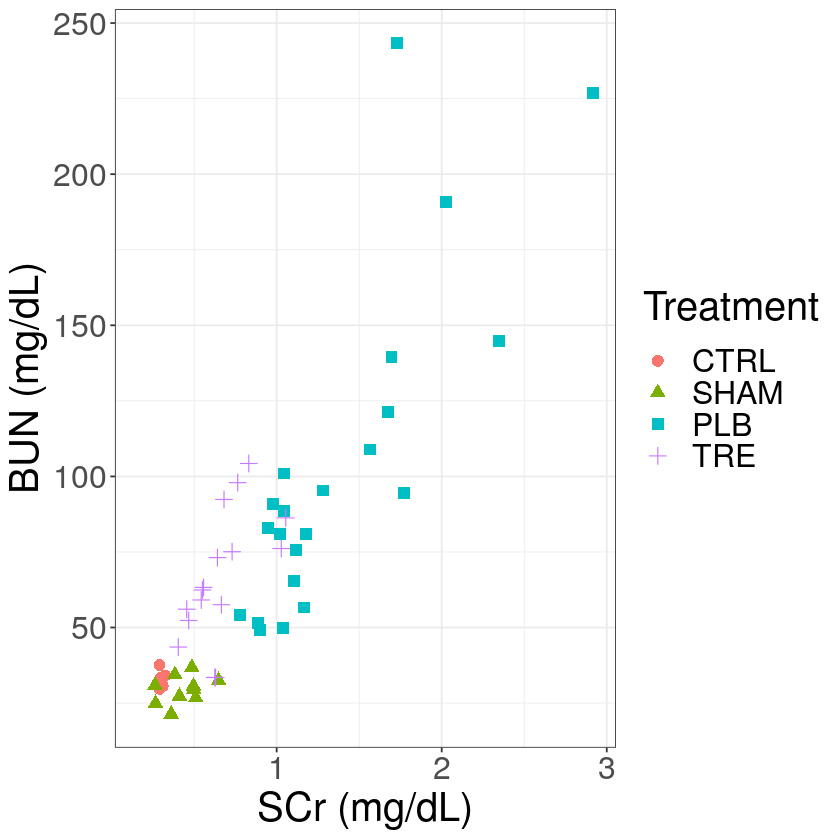

In [6]:
# create a scatter plot, set the aesthetic (aes), set the colors and shapes of the data points by the Treatment factor levels, label the axes, and make the plot pretty
SCr_scatter <- biomarker_df %>%
    ggplot(aes(x = SCr, y = BUN)) +
        geom_point(size = 3, aes(color = Treatment, shape = Treatment)) +
        xlab("SCr (mg/dL)") +
        ylab("BUN (mg/dL)") +
        theme_bw() +
        theme(text=element_text(size = 24))
SCr_scatter

We can see from the scatter plot that there appears to be a strong positive correlation between SCr and BUN.  However, we have some extreme values at the high concentrations of the biomarkers.  These data points represent extreme kidney injury that may not be treatable.  Because of this, they may not be useful to our analysis.  Let's remove these outliers using the <b>dplyr</b> <i>filter</i> function and replot the data.

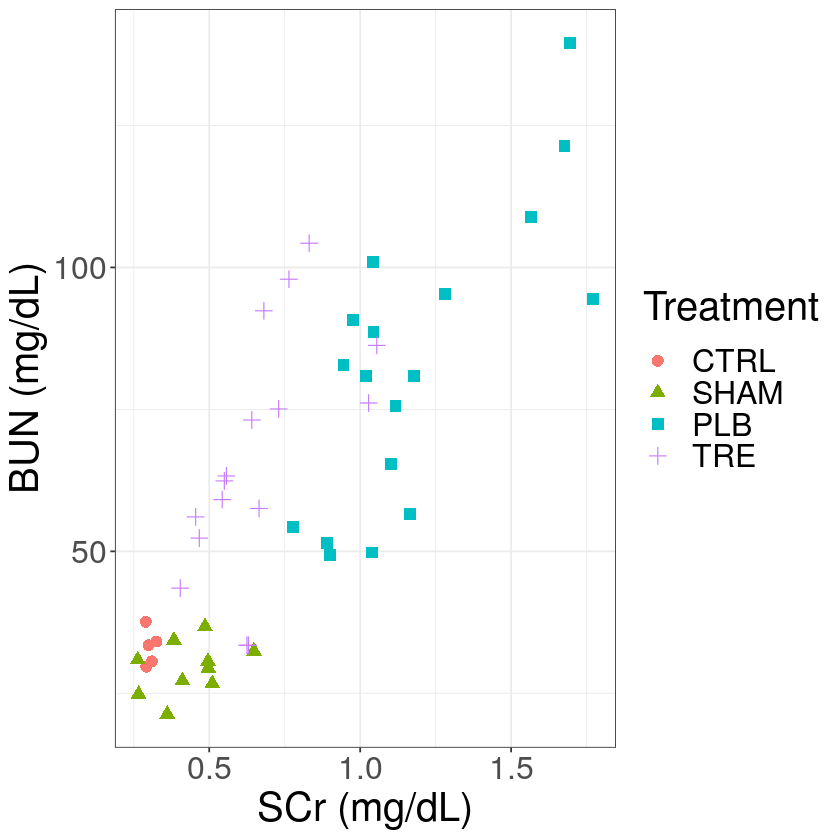

In [7]:
# remove values with SCR >= 2 mg/dL or BUN >= 200 mg/dL and replot the data
biomarker_noOutliers_df <- biomarker_df %>%
    filter(SCr <= 2) %>%
    filter(BUN <= 200)
SCr_scatter_noOutliers <- biomarker_noOutliers_df %>%
    ggplot(aes(x = SCr, y = BUN)) +
        geom_point(size = 3, aes(color = Treatment, shape = Treatment)) +
        xlab("SCr (mg/dL)") +
        ylab("BUN (mg/dL)") +
        theme_bw() +
        theme(text=element_text(size = 24))
SCr_scatter_noOutliers

Because we saved our plot in a variable, we can add new layers to it instead of writing out the entire <i>ggplot</i> data from before.  We will use <i>geom_smooth</i> to add a regression line and 95% confidence intervals.

`geom_smooth()` using formula = 'y ~ x'


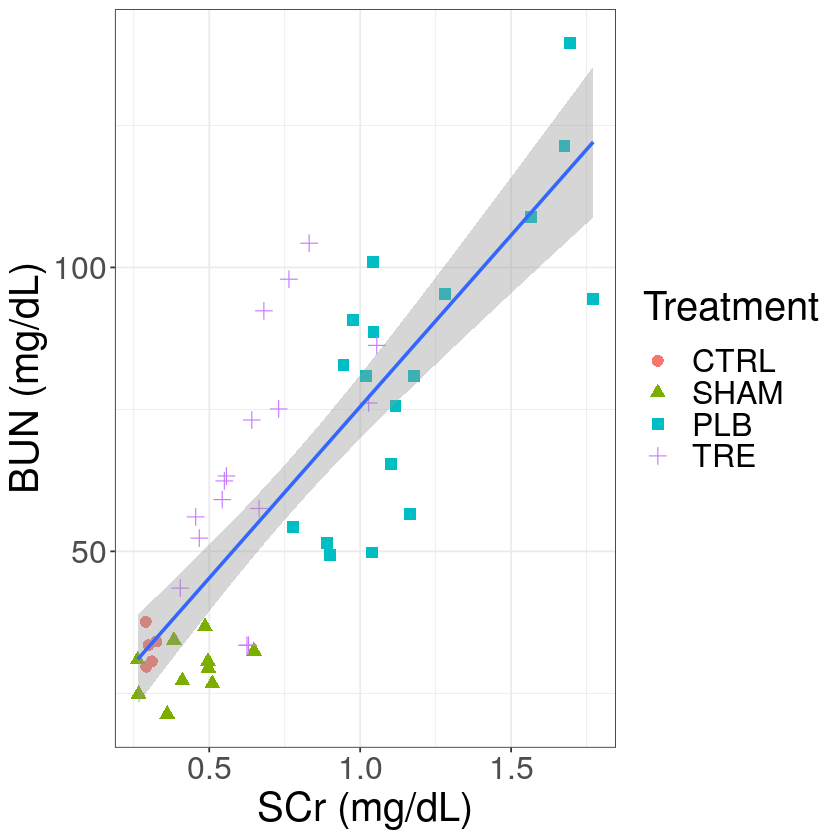

In [8]:
SCr_scatter_noOutliers +
    geom_smooth(method="lm")

While this is interesting, what we really care about is the differences between the treatment groups, particularly between the trep treated group and the placebo group.  Let's visualize the data as box plots with the data separated by treatment groups.

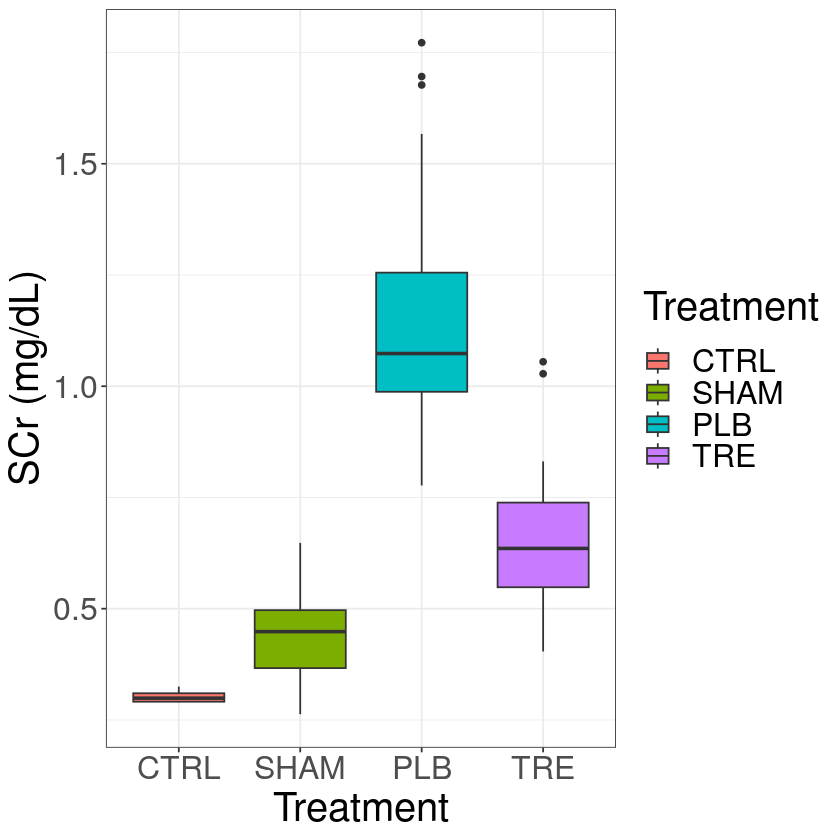

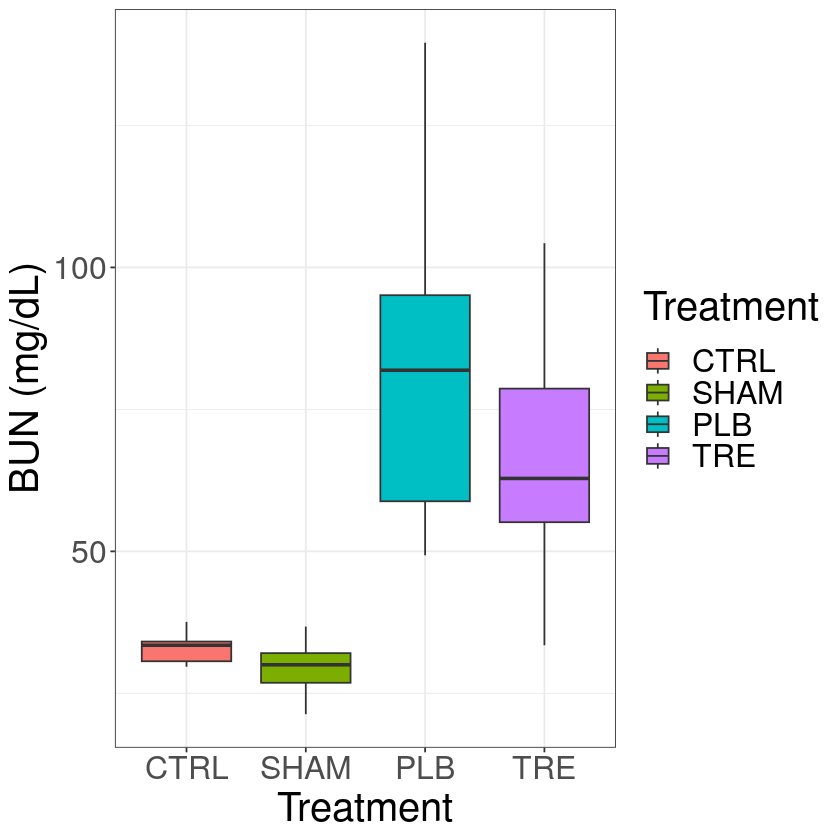

In [9]:
ggplot(biomarker_noOutliers_df, aes(x = Treatment, y = SCr, fill = Treatment)) +
    geom_boxplot(aes(group = Treatment)) +
    ylab("SCr (mg/dL)") +
    theme_bw() +
    theme(text=element_text(size = 24))
ggplot(biomarker_noOutliers_df, aes(x = Treatment, y = BUN, fill = Treatment)) +
    geom_boxplot(aes(group = Treatment)) +
    ylab("BUN (mg/dL)") +
    theme_bw() +
    theme(text=element_text(size = 24))

For both biomarkers, the control and sham groups are fairly similar while the concentrations of both are elevated in in the placebo group.  The trep treated samples showed lower mean concentration of both biomarkers, though not to the level of the control/sham groups. The trep group trending toward healthy or control is expected as this treatment has shown to improve disease state in the literature. The effect also seems to be more prominent with SCr than with BUN.  From the scatter plots and box plots, we now have an idea of what our regression results will look like.  Let's start with a simple linear regression ignoring the Treatment effect to validate our observation from the scatter plot, i.e. that the two biomarkers are positively correlated.  Let's run it first with the data WITH outliers.

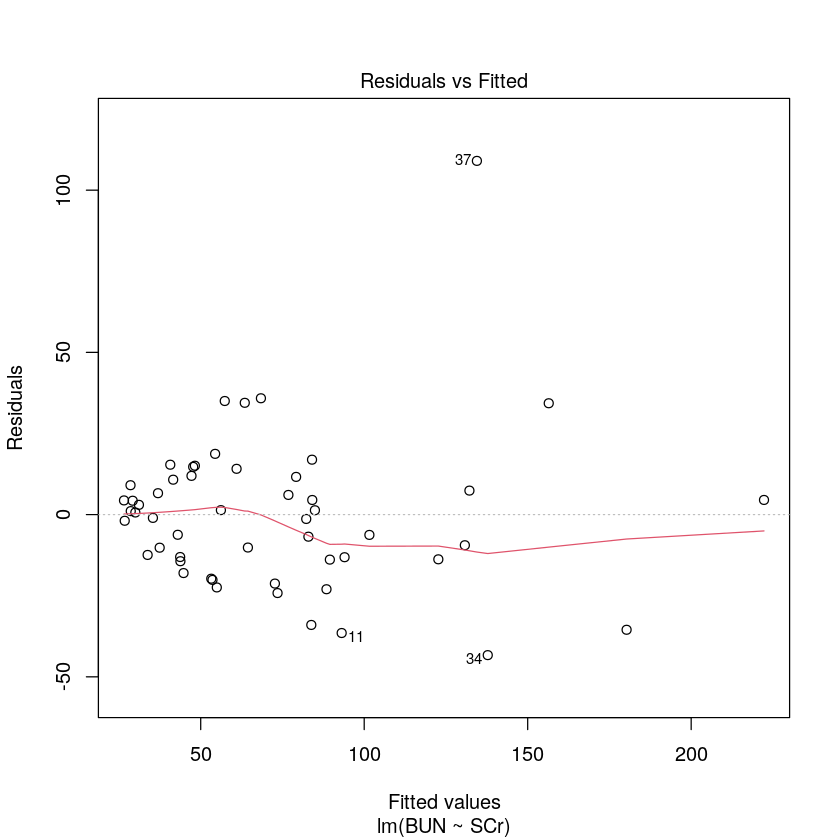

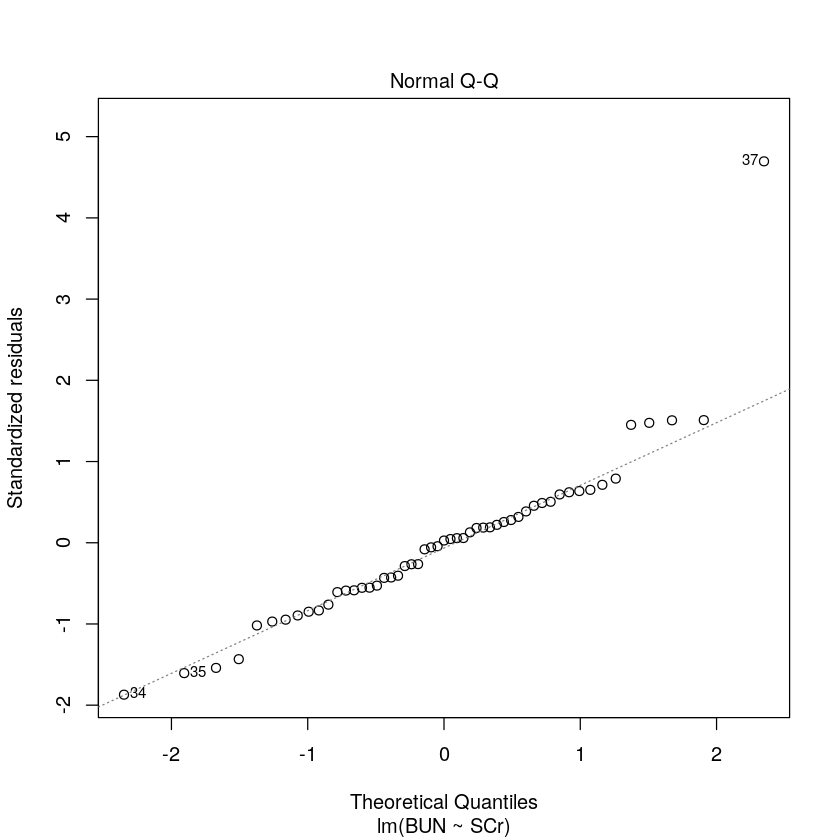

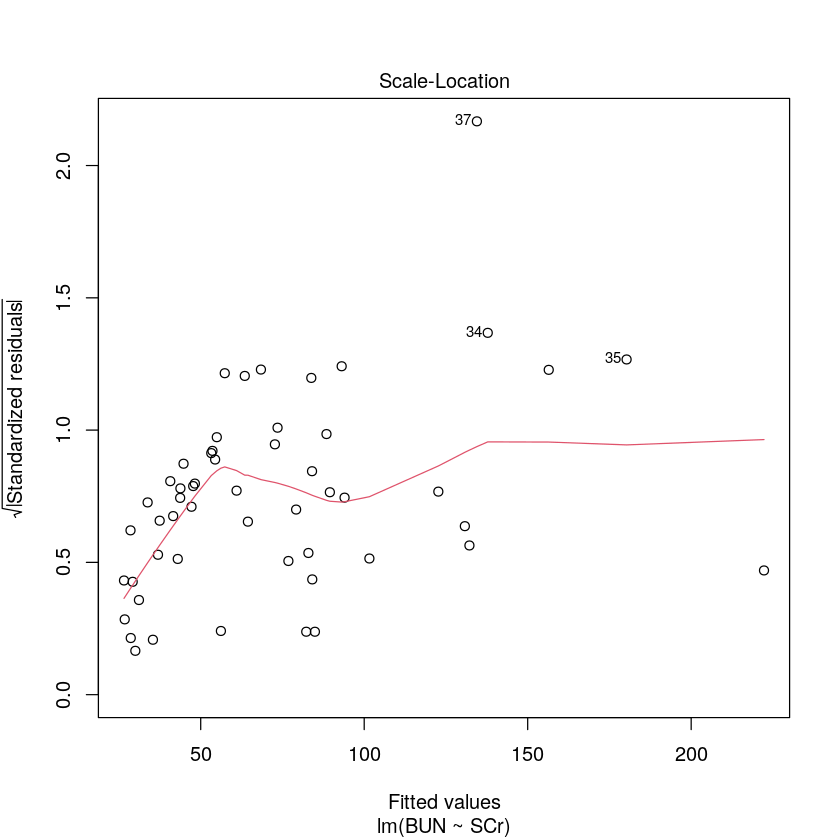

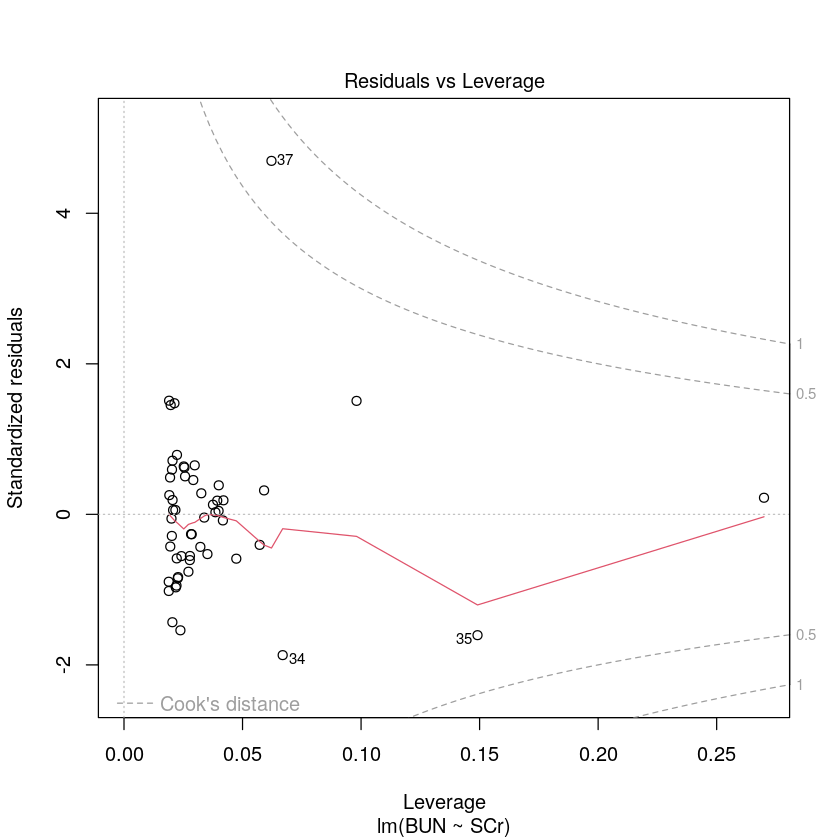

In [10]:
# Run a simple linear regression using BUN as the dependent variable and SCr as the independent variable and produce diagnostics plots

biomarkers_lm <- lm(BUN ~ SCr, data = biomarker_df)
plot(biomarkers_lm)

These four plots are common diagnostic plots for linear regression.  They can be interpreted as follows:

- The residuals vs. fitted plot gives us a measure of the <b>homoscedasticity</b> of the data, that is, is there equal variance in the different groups.  If the data is randomly distributed around 0, then the variances are probably equal.  If there is a fanning effect from left to right, the variances are probably not equal.  Other patterns can indicate non-linear relationships between the data.  Our data appears to be heteroscedastic and at least one of the outliers (point 37) is clear.

- The Q-Q plot indicates if the data is normally distributed.  If the data points fall on the 45 degree line, the data is normally distributed.  Different deviations from this pattern can indicate skewed, tailed or bimodal distributions.  Our data doesn't look bad but again the outliers are obvious (hello again 37).

- The scale location plot is another test of homoscedasticity and like the residuals vs fitted plot, we're looking for a horizontal line with randomly distributed data.  Again, our data looks like the variances are not equal and 37 is still taunting us.

- The residuals vs. leverage plot tells us which points are likely to significantly affect the coefficients of our regression model if they were removed.  The dotted lines represent the <b>Cook Distances</b>.  Anything outside of these lines is a potential troublemaker.  I imagine you can already guess who we're talking about.

Let's run the regression again without the outliers.

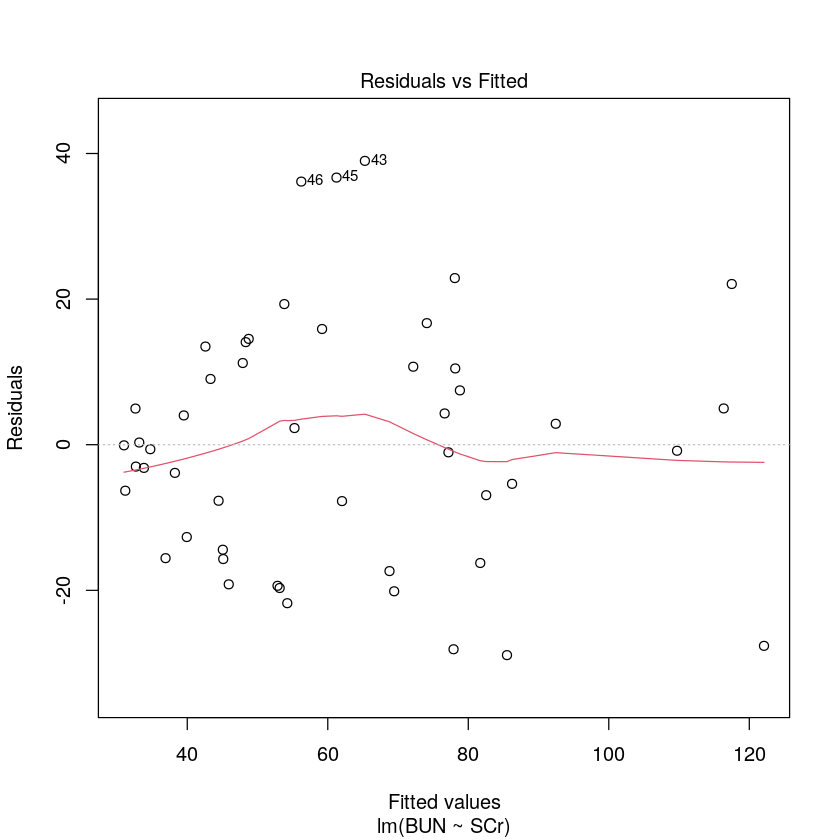

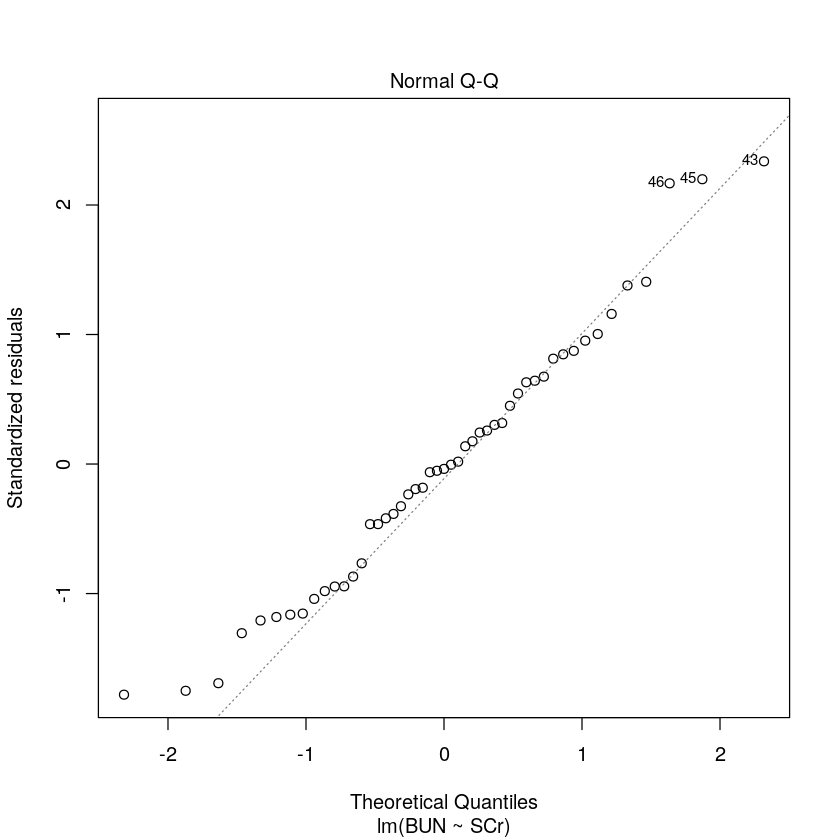

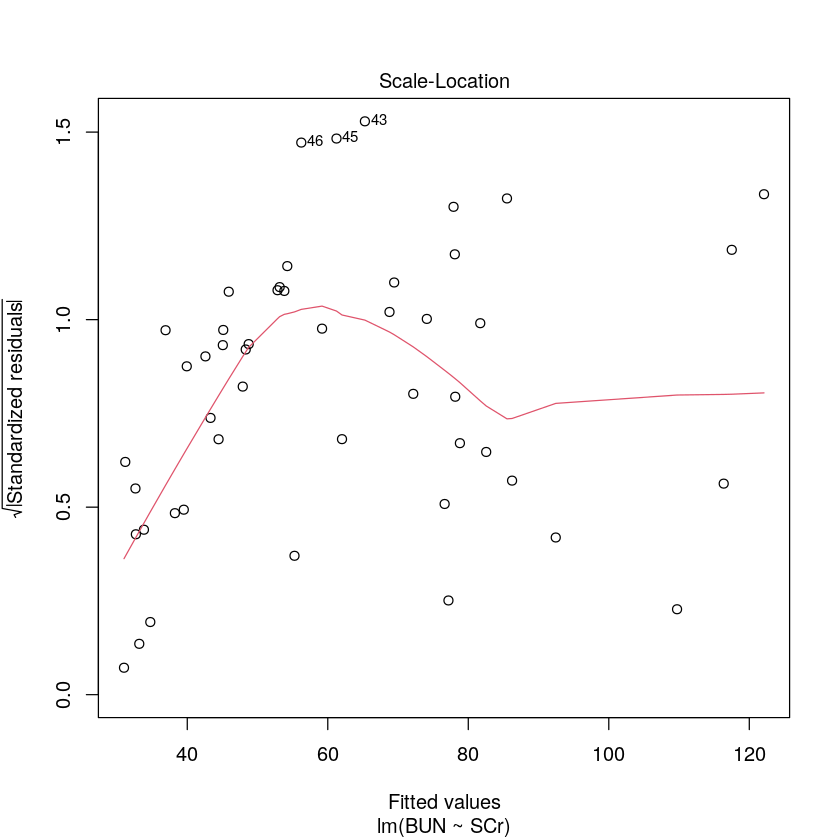

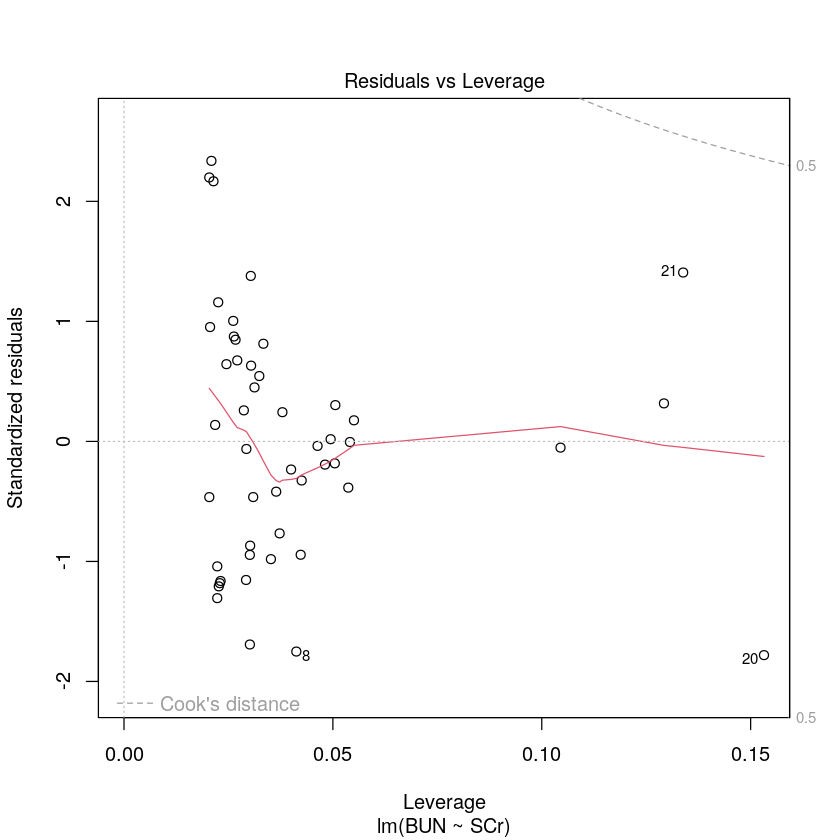

In [11]:
#remove outliers and plot the linear model
biomarkers_noOutliers_lm <- lm(BUN ~ SCr, data = biomarker_noOutliers_df)
plot(biomarkers_noOutliers_lm)

Our residuals vs. fitted, Q-Q, and residuals vs. leverage plots look much better now without 37 mucking things up.  Our scale location plot is still a bit messy, but it's good enough for our purposes.  Let's move on and look at the results of our regression.

<div class="alert alert-block alert-warning">
<b>&#127891; Note:</b> There are ways to address the heteroscedasticity, such as log or square root transformation.  For the purposes of this module, we will forge ahead as is, but feel free to play with the data on your own to see how different transformation affect that plots. 
</div>

The <i>summary</i> function is very useful for analyzing linear regression, ANOVA and similar data.

In [12]:
summary(biomarkers_noOutliers_lm)


Call:
lm(formula = BUN ~ SCr, data = biomarker_noOutliers_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.899 -14.421  -0.618  10.713  38.985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   15.117      5.284   2.861  0.00629 ** 
SCr           60.370      6.121   9.862    5e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.86 on 47 degrees of freedom
Multiple R-squared:  0.6742,	Adjusted R-squared:  0.6673 
F-statistic: 97.27 on 1 and 47 DF,  p-value: 4.999e-13


Under estimate we see slope as ~60 and the intercept as ~15. The results show that for every 1 unit increase in SCr, BUN increases by ~60 units.  However, our adjusted R-squared value is low indicating that there is some variability in our data.  Overall, we see that there is a strong correlation between SCr and BUN concentrations, with small changes in SCr correlating to larger changes in BUN.  This suggests that BUN can likely be used as a biomarker (as we already know of course).  A more important question for our purposes, however, is whether it can distinguish between the placebo (diseased) state and the treated state.  To test that, we will need to include the Treatment state in our regression model.  Let's start by plotting out data again, this time breaking out regression line up by group.

<div class="alert alert-block alert-info">
<b>&#9995; Tip:</b> Run the model with the outliers and see how it affects the results.</div>

`geom_smooth()` using formula = 'y ~ x'


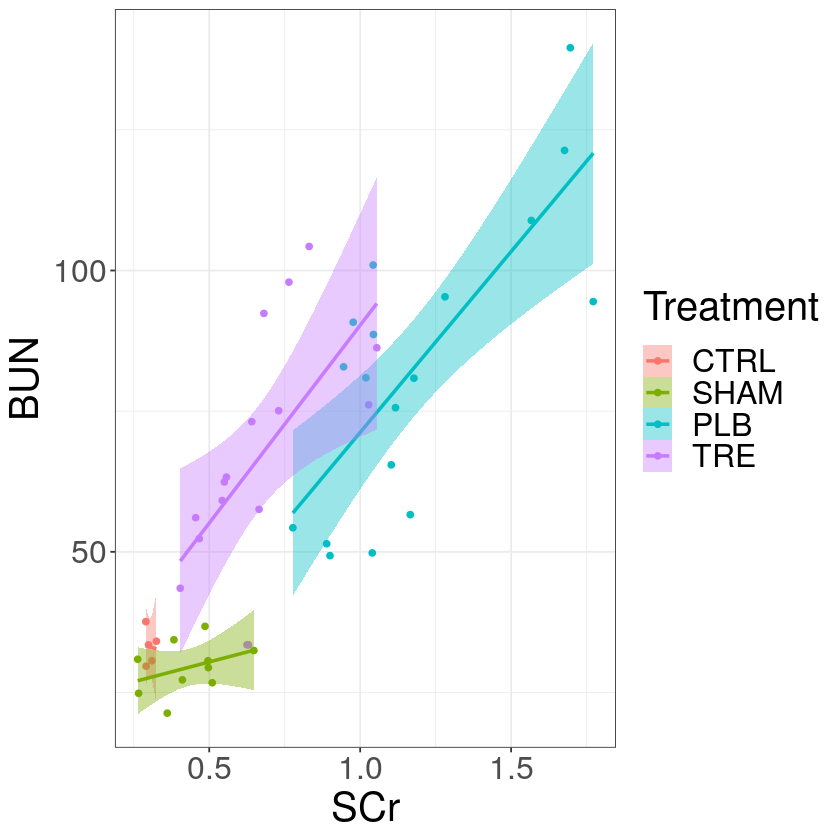

In [13]:
biomarker_noOutliers_df %>%
    ggplot(aes(x=SCr, y=BUN, group=Treatment, color=Treatment)) +
    geom_point() +
    geom_smooth(method="lm", aes(fill=Treatment)) +
    theme_bw() +
    theme(text=element_text(size = 24))

<div class="alert alert-block alert-warning">
    <b>&#127891; Alternative Plotting Strategy: <i>ggpubr</i></b><br>We'll recreate the above graph using the <i>ggpubr</i> package which is particularly useful for creating publication quality figures.  You're encouraged to explore the <i>ggpubr</i> documentation to figure out what is happening in each layer.
</div>

Warning message:
“The dot-dot notation (`..rr.label..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(rr.label)` instead.
ℹ The deprecated feature was likely used in the ggpubr package.
  Please report the issue at <https://github.com/kassambara/ggpubr/issues>.”


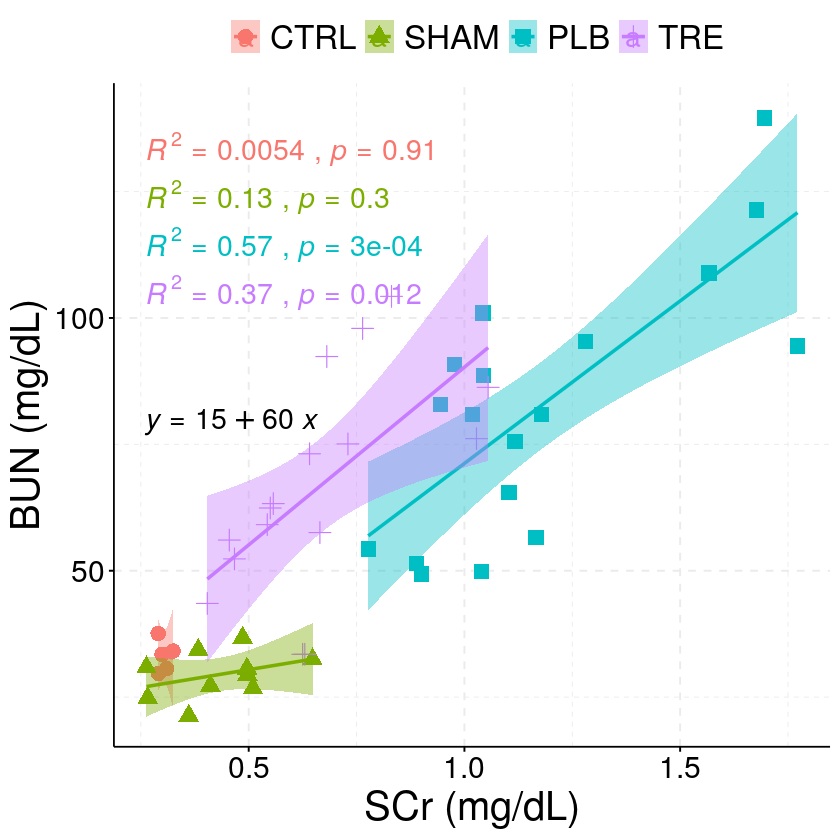

In [14]:
SCr_scatter_ggpubr <-
    ggscatter(
        biomarker_noOutliers_df,
        x = "SCr", y = "BUN",
        color = "Treatment",
        shape = "Treatment", size = 4,
        add = "reg.line",
        add.params = list(color="Treatment", fill = "Treatment"),
        conf.int = TRUE,
        ggtheme = theme_pubr()
    ) +
    grids(linetype = "dashed") +
    stat_regline_equation(
        label.x.npc = "left", 
        label.y.npc = "middle",
        size = 6
    ) +
    stat_cor(
        method="pearson", 
        size=6,
        aes(
            color=Treatment,
            label = paste(..rr.label.., ..p.label.., sep = "~`,`~")
        )) +
    font("xlab",size=24) +
    font("ylab",size=24) +
    font("xy.text",size=18) +
    font("legend.text", size=20) +
    theme(legend.title= element_blank())

ggpar(
    SCr_scatter_ggpubr,
    xlab = "SCr (mg/dL)",
    ylab = "BUN (mg/dL)"
)

Now we see that the slope changes significantly based on group.  The control and sham groups show almost no change in BUN levels between samples while the placebo and trep treated groups show larger positive relationships.  Let's now go to the regression model using BUN as the dependent variable.

In [15]:
biomarkers_noOutliers_lm <- lm(BUN ~ Treatment, data = biomarker_noOutliers_df)
summary(biomarkers_noOutliers_lm)


Call:
lm(formula = BUN ~ Treatment, data = biomarker_noOutliers_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.302  -8.144  -0.054   8.178  56.958 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     33.102      9.008   3.675 0.000631 ***
TreatmentSHAM   -3.628     11.032  -0.329 0.743790    
TreatmentPLB    49.520     10.182   4.863 1.45e-05 ***
TreatmentTRE    33.549     10.320   3.251 0.002181 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.14 on 45 degrees of freedom
Multiple R-squared:  0.5547,	Adjusted R-squared:  0.525 
F-statistic: 18.69 on 3 and 45 DF,  p-value: 5.117e-08


The intercept term represents the mean of the control group, which is ~33 mg/dL BUN.  We add the coefficients for each factor to this value to get each groups' mean, so SHAM = 33.102 - 3.628 = 29.474, PLB = 33.102 + 49.520 = 82.622, TRE = 33.102 + 33.549 = 66.651.  Both placebo and treated group means are elevated compared to the control, and both have significant <i>p</i>-values.  BUN can likely distinguish between healthy and injured states, and may be able to distinguish the treated and placebo states.  Let's compare the results to SCr.

In [16]:
biomarkers_noOutliers_lm <- lm(SCr ~ Treatment, data = biomarker_noOutliers_df)
summary(biomarkers_noOutliers_lm)


Call:
lm(formula = SCr ~ Treatment, data = biomarker_noOutliers_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4003 -0.1343 -0.0211  0.0649  0.5947 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.3030     0.0986   3.073  0.00359 ** 
TreatmentSHAM   0.1291     0.1208   1.069  0.29075    
TreatmentPLB    0.8743     0.1115   7.844 5.82e-10 ***
TreatmentTRE    0.3611     0.1130   3.197  0.00254 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2205 on 45 degrees of freedom
Multiple R-squared:  0.7116,	Adjusted R-squared:  0.6924 
F-statistic: 37.01 on 3 and 45 DF,  p-value: 3.279e-12


For SCr, both placebo and and treated states have significant p-values, but based on our scatter plot, it looks like the two states separate better by SCr values than BUN.  It thus seems likely that SCr is more sensitive to state changes, a result that is consistent with clinical consensus.

---

## Evaluating Biomarkers Using Logistic Regression

A common situation in biomedical research is comparing results between two specific states, for example, control vs. disease or placebo vs. treatment.  In these situations, we can employ a binary classification scheme for our two states in which the state is represented by a binary dummy variable consisting of 0 and 1.  Linear regression will not work for such a system, but logistic regression works very well.  Common classification schemes include:

<ul>
    <li>Classification by experiment design (e.g. placebo vs. control)</li>
    <li>Classification by clinical diagnosis (e.g. healthy vs. diseased)</li>
    <li>Classification by biomarker standard (e.g. biomarker concentration above cutoff vs. biomarker concentration below cutoff)</li>
</ul>

How you classify your data is up to you, but it should reflect proper experimental design and should address a specific hypothesis.

Let's start our analysis by creating a dummy binary variable.  By convention, we call this variable <i>D</i> with the "healthy" state as 0 and the "diseased" state as 1.  Our first scenario will use an SCr concentration cutoff to establish our binary variable (SCr >= 1 is our injured state).

In [17]:
#adding D column with values
biomarker_noOutliers_df$D <- ifelse(biomarker_noOutliers_df$SCr >=1 ,1,0)
biomarker_noOutliers_df

Sample,SCr,BUN,Treatment,Time,Batch,D
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
LK83.1,0.291,29.68,CTRL,0,2,0
LK83.2,0.310,30.65,CTRL,0,2,0
LK83.3,0.325,34.12,CTRL,0,2,0
Control1,0.290,37.59,CTRL,0,1,0
Control2,0.299,33.47,CTRL,0,1,0
X05.1,1.103,65.46,PLB,1,1,1
X05.2,1.117,75.62,PLB,1,1,1
X05.3,1.166,56.61,PLB,1,1,1
X29.1,0.777,54.28,PLB,1,1,0


This classification ignores our experimental groups but let's refer back to our scatter plot to predict what the results might look like.

<div class="alert alert-block alert-info">
    <b>&#9995; Tip:</b> <b>If...Else</b> blocks are a fundamental tool of logic control in programming.  The <i>ifelse</i> function is a quick and dirty implementation for simple logic circuits.  Basically, this command says "If SCr value is greater than or equal to 1, return the value 1, otherwise return 0".  These values are then stored in the new column <i>D</i>.</div>

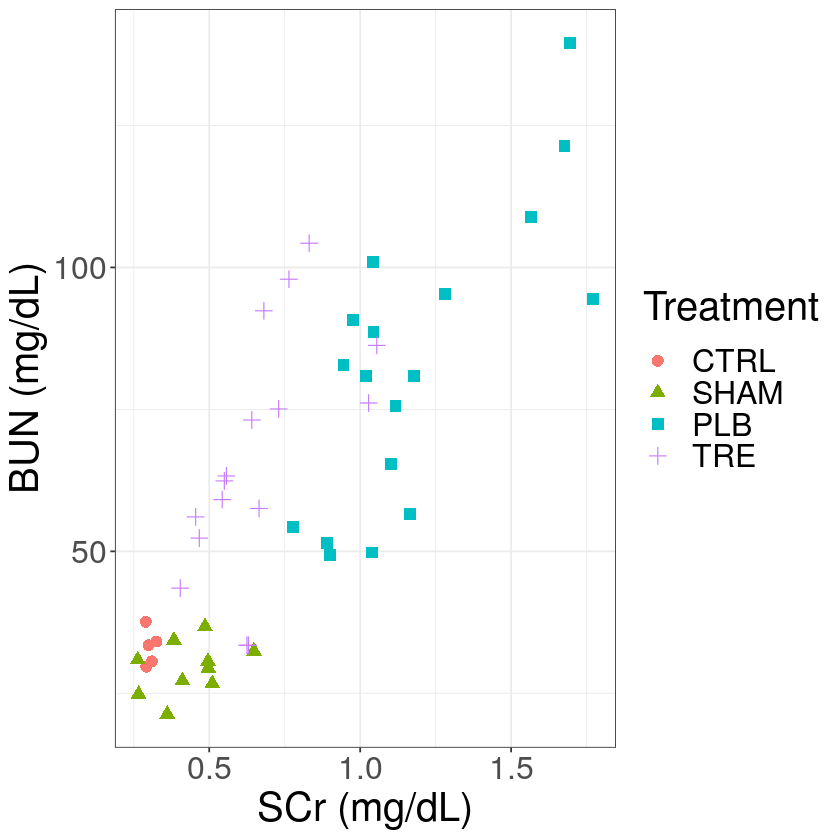

In [18]:
SCr_scatter_noOutliers

An SCR cutoff at 1 mg/dL should distinguish well between the placebo (injured) states and the control/sham states, though some placebo groups that are under that cutoff will likely be falsely assigned.  It also looks like most of the trep treated samples will fall below this cutoff.  BUN, however, tells a different story.  While the control/sham and placebo groups seem to clearly separate around 50 mg/dL, there is much more overlap between the placebo and trep treated groups.  Let's plot the logistic curve using the <i>glm</i> method.

`geom_smooth()` using formula = 'y ~ x'


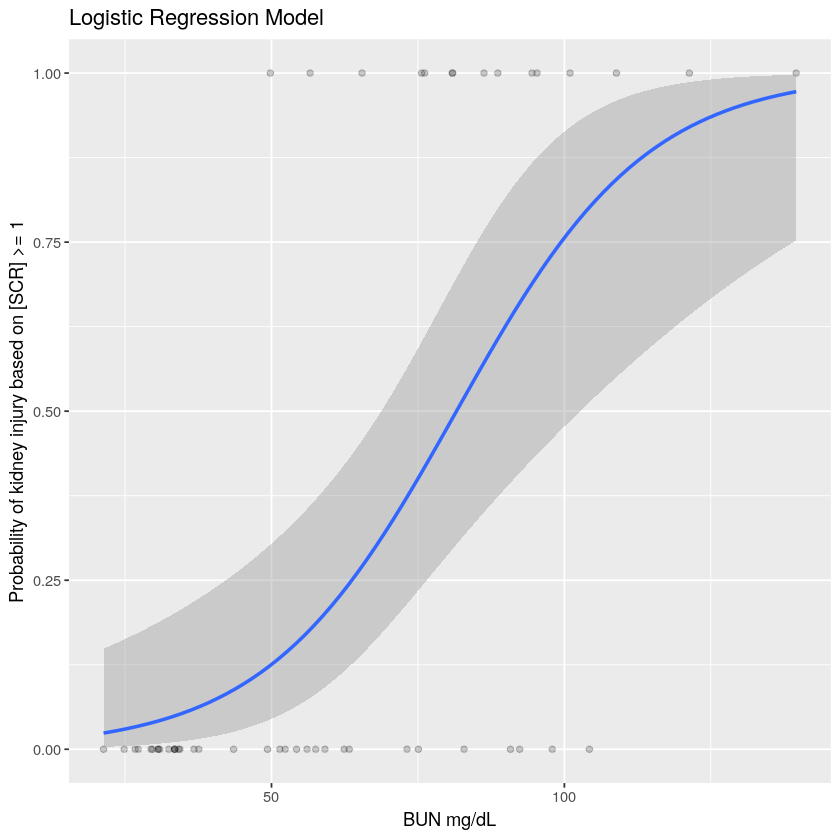

In [19]:
biomarker_noOutliers_df %>%
  ggplot(aes(BUN, D)) +
  geom_point(alpha = 0.2) +
  geom_smooth(method = "glm", method.args = list(family = "binomial")) +
  labs(
    title = "Logistic Regression Model", 
    x = "BUN mg/dL",
    y = "Probability of kidney injury based on [SCR] >= 1"
    )

The inflection point occurs around BUN 75 mg/dL and we can see that there is overlap between our two states.  Let's run the regression.  BUN will be our independent variable and the dependent variable will always be our binary dummy variable.

<div class="alert alert-block alert-info">
    <b>&#9995; Tip:</b> <b>family</b> defines what is called the <i>link function</i> of our regression model.  In linear regression, the link function is <i>identity</i> (<b>family = "gaussian"</b>).  For logistic regression, the link function is <i>logit</i> (<b>family = "binomial"</b>).</div>

In [20]:
#plotting the logistic regression by calling the glm function
biomarkers_logistic_SCr1 <- glm(D ~ BUN, data = biomarker_noOutliers_df, family = "binomial")
summary(biomarkers_logistic_SCr1)


Call:
glm(formula = D ~ BUN, family = "binomial", data = biomarker_noOutliers_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7983  -0.5848  -0.3086   0.5847   2.0429  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.01800    1.35814  -3.695 0.000220 ***
BUN          0.06151    0.01782   3.451 0.000558 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60.364  on 48  degrees of freedom
Residual deviance: 40.045  on 47  degrees of freedom
AIC: 44.045

Number of Fisher Scoring iterations: 5


A 1 mg/dL increase in BUN is associated with a log odds increase of ~0.06 or an odds increase of ~1.06.  Not a huge change but it is statistically significant.  Now let's see what the ROC curve looks like.

<div class="alert alert-block alert-info">
    <b>&#9995; Tip:</b> <b>ROC</b> stands for <b>receiver operating characteristic</b> and plots the true positive rate against the false positive rate.  It was originally used in World War II to identify and classify radar signals, but has utility in many different fields such as biomarker discovery and assessment of machine learning algorithms.  The <b>area under the curve (AUC)</b> provides an assessment of the scheme, with AUC=1 being perfect classification and AUC=0.5 representing random assortment.</div>

In [21]:
roc(D ~ BUN, biomarker_noOutliers_df)

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.formula(formula = D ~ BUN, data = biomarker_noOutliers_df)

Data: BUN in 34 controls (D 0) < 15 cases (D 1).
Area under the curve: 0.8706

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = biomarker_noOutliers_df$D, predictor = biomarker_noOutliers_df$BUN,     percent = FALSE, ci = TRUE, plot = TRUE, boot.n = 100, ci.alpha = 0.9,     stratified = FALSE, auc.polygon = TRUE, max.auc.polygon = TRUE,     grid = TRUE, print.auc = TRUE, show.thres = TRUE)

Data: biomarker_noOutliers_df$BUN in 34 controls (biomarker_noOutliers_df$D 0) < 15 cases (biomarker_noOutliers_df$D 1).
Area under the curve: 0.8706
95% CI: 0.7718-0.9694 (DeLong)

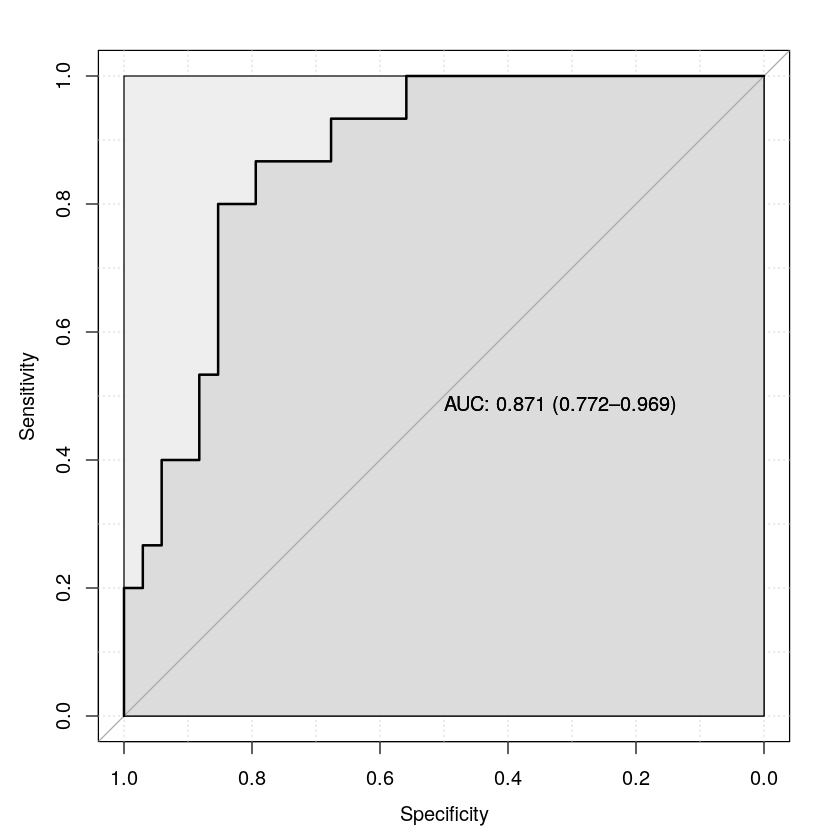

In [22]:
#plotting the ROC curve
roc(biomarker_noOutliers_df$D,
            biomarker_noOutliers_df$BUN, percent=FALSE,
            ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
            plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
            print.auc=TRUE, show.thres=TRUE)

AUC = 0.871 isn't bad.  This suggests that BUN can be used to classify healthy/treated states from the injured state, but this might just be due to the wide concentration ranges in the placebo group.  

<div class="alert alert-block alert-warning">
<b>&#127891; Self-Assessment:</b> Try setting different SCr cutoffs to see how it affects the results.  Also, try the opposite analysis by checking SCr vs. a BUN concentration cutoff.  How does SCr compare to BUN?  
</div>

Sometimes, we may want to compare molecular data to clinical diagnostic data.  For example, in a clinical trial, patients will be classified based on clinical criteria into categories such as healthy vs. diseased or degree of disease state.  Do these clinical criteria accurately reflect molecular changes in disease state?  It's possible that clinical classifications may represent a "trailing effect".  In other words, the molecular data could indicate a change of state before that state change is visibly obvious. 

We can set up a similar classification scheme with the IRI data.  This time, instead of using a SCr cutoff, we are going to define our groups based on our experimental design by explicitly defining the placebo (PLB) group as the "diseased" group and all other groups as "healthy".  Our hypothesis is that the molecular data from the trep treated samples will more closely resemble those of the healthy samples.  If this is the case, we should see a clear break between the placebo and the treated/healthy samples.  If the break is not clear, it may still give us an indication of how effective the treatment is in bringing biomarker levels in the injured state back to the healthy state.

In [23]:
biomarker_noOutliers_df$D <- ifelse(biomarker_noOutliers_df$Treatment == "PLB",1,0)
biomarker_noOutliers_df

Sample,SCr,BUN,Treatment,Time,Batch,D
<chr>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>
LK83.1,0.291,29.68,CTRL,0,2,0
LK83.2,0.310,30.65,CTRL,0,2,0
LK83.3,0.325,34.12,CTRL,0,2,0
Control1,0.290,37.59,CTRL,0,1,0
Control2,0.299,33.47,CTRL,0,1,0
X05.1,1.103,65.46,PLB,1,1,1
X05.2,1.117,75.62,PLB,1,1,1
X05.3,1.166,56.61,PLB,1,1,1
X29.1,0.777,54.28,PLB,1,1,1


Now, lets run the logistic regression model. 

In [24]:
biomarkers_logistic_PLB <- glm(D ~ BUN, data = biomarker_noOutliers_df, family = "binomial")
summary(biomarkers_logistic_PLB)


Call:
glm(formula = D ~ BUN, family = "binomial", data = biomarker_noOutliers_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8140  -0.7340  -0.4451   0.8123   1.7669  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.79906    1.06052  -3.582 0.000341 ***
BUN          0.05016    0.01489   3.370 0.000753 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64.438  on 48  degrees of freedom
Residual deviance: 47.786  on 47  degrees of freedom
AIC: 51.786

Number of Fisher Scoring iterations: 4


`geom_smooth()` using formula = 'y ~ x'


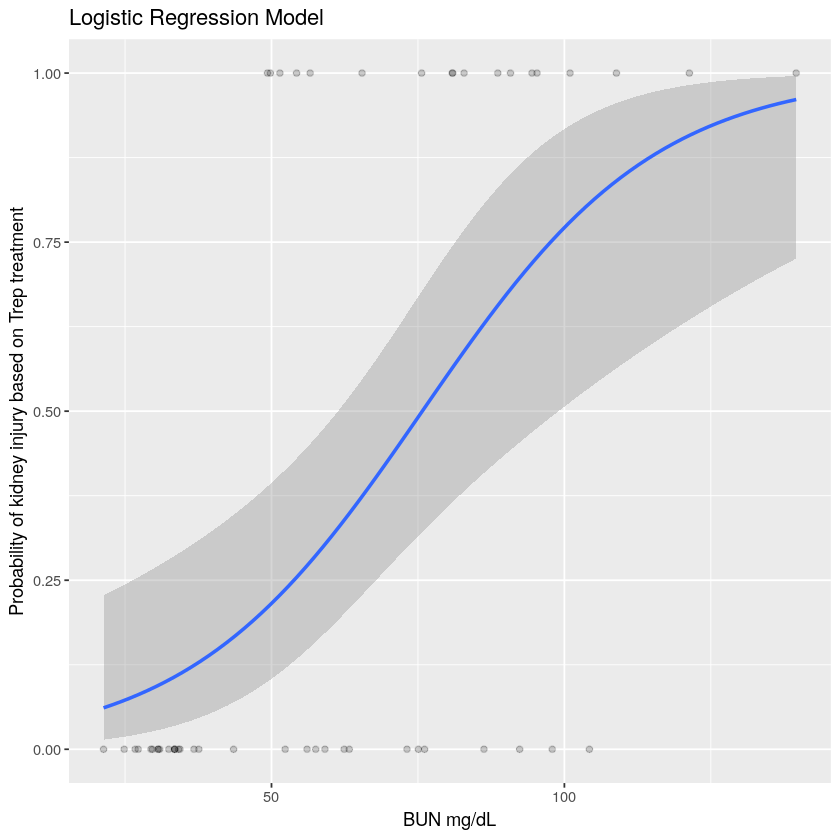

In [25]:
biomarker_noOutliers_df %>%
  ggplot(aes(BUN, D)) +
  geom_point(alpha = 0.2) +
  geom_smooth(method = "glm", method.args = list(family = "binomial")) +
  labs(
    title = "Logistic Regression Model", 
    x = "BUN mg/dL",
    y = "Probability of kidney injury based on Trep treatment"
    )

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = biomarker_noOutliers_df$D, predictor = biomarker_noOutliers_df$BUN,     percent = FALSE, ci = TRUE, plot = TRUE, boot.n = 100, ci.alpha = 0.9,     stratified = FALSE, auc.polygon = TRUE, max.auc.polygon = TRUE,     grid = TRUE, print.auc = TRUE, show.thres = TRUE)

Data: biomarker_noOutliers_df$BUN in 31 controls (biomarker_noOutliers_df$D 0) < 18 cases (biomarker_noOutliers_df$D 1).
Area under the curve: 0.8262
95% CI: 0.7124-0.94 (DeLong)

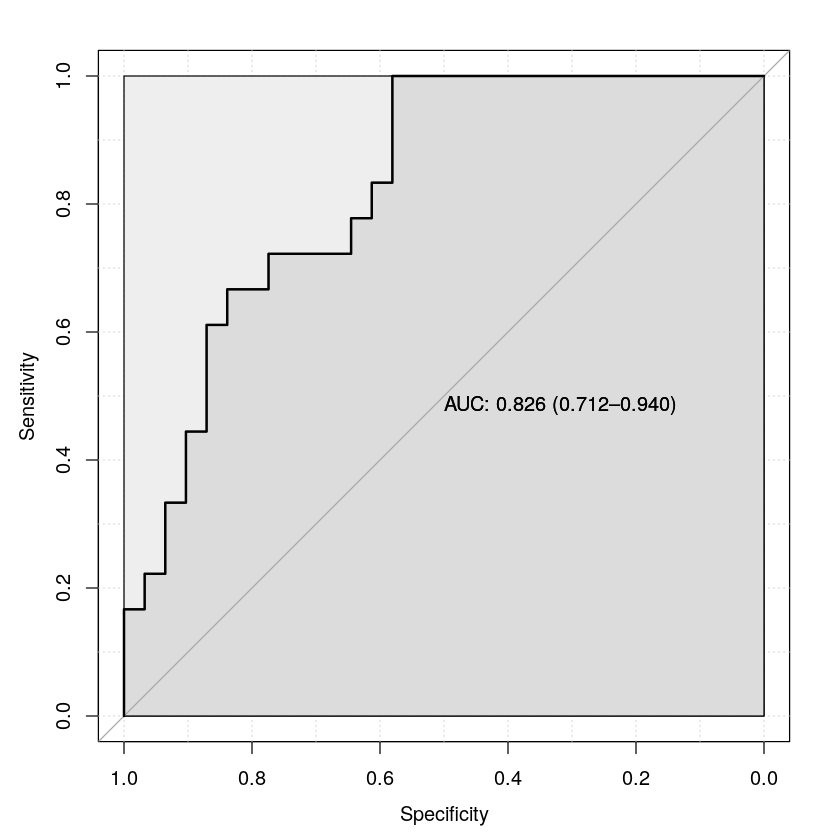

In [26]:
roc(biomarker_noOutliers_df$D,
            biomarker_noOutliers_df$BUN, percent=FALSE,
            ci=TRUE, boot.n=100, ci.alpha=0.9, stratified=FALSE,
            plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
            print.auc=TRUE, show.thres=TRUE)

The results are very similar, but they tell us different stories based upon the question (i.e. the classification scheme) we asked.  In the first scenario, we showed that SCr cutoffs can be used to distinguish between the healthy and injured groups and that the treated group tends to approximate the healthy samples, more so for SCr than for BUN.  In the second scenario, we explicitly asked if the treated samples approximated the healthy samples, but we didn't make this determination with respect to SCr.

<div class="alert alert-block alert-warning">
<b>&#127891; Self-Assessment:</b> As before, try the above scenario using SCr as the biomarker, or by classifying TRE vs PLB without the healthy samples. 
</div>

---

### Overview

These results show (as expected) that both SCr and BUN are useful biomarkers that correlate strongly and can distinguish between healthy and injured states.  SCr appears to be more sensitive than BUN, particularly when distinguishing between the placebo and trep treated states.  While these examples are somewhat contrived since we already know the utility of these two biomarkers, these methods can be used to assess any biomarker, such as those identified in omics data.  In the next chapter, we will begin examining proteomics data from the IRI model to identify new potential biomarkers. 

---

<p><span style="font-size: 30px"><b>Quizzes</b></span> <span style="float : inline;">(run the command below to display the quizzes)</span> </p>

In [27]:
IRdisplay::display_html('<iframe src="quizes/Chapter6_Quizes.html" width=100% height=450></iframe>')

## References

[Shiva N, Sharma N, Kulkarni YA, Mulay SR, Gaikwad AB. Renal ischemia/reperfusion injury: An insight on in vitro and in vivo models. Life Sci. 2020 Sep 1;256:117860. doi: 10.1016/j.lfs.2020.117860. Epub 2020 Jun 11. PMID: 32534037.][shiva]

[Hou J, Tolbert E, Birkenbach M, Ghonem NS. Treprostinil alleviates hepatic mitochondrial injury during rat renal ischemia-reperfusion injury. Biomed Pharmacother. 2021 Nov;143:112172. doi: 10.1016/j.biopha.2021.112172. Epub 2021 Sep 21. PMID: 34560548; PMCID: PMC8550798.][hou]

[Ding M, Tolbert E, Birkenbach M, Gohh R, Akhlaghi F, Ghonem NS. Treprostinil reduces mitochondrial injury during rat renal ischemia-reperfusion injury. Biomed Pharmacother. 2021 Sep;141:111912. doi: 10.1016/j.biopha.2021.111912. Epub 2021 Jul 15. PMID: 34328097; PMCID: PMC8429269.][ding]


[ding]: https://pubmed.ncbi.nlm.nih.gov/34328097/ "Ding M, Tolbert E, Birkenbach M, Gohh R, Akhlaghi F, Ghonem NS. Treprostinil reduces mitochondrial injury during rat renal ischemia-reperfusion injury. Biomed Pharmacother. 2021 Sep;141:111912. doi: 10.1016/j.biopha.2021.111912. Epub 2021 Jul 15. PMID: 34328097; PMCID: PMC8429269."
[hou]: https://pubmed.ncbi.nlm.nih.gov/34560548/ "Hou J, Tolbert E, Birkenbach M, Ghonem NS. Treprostinil alleviates hepatic mitochondrial injury during rat renal ischemia-reperfusion injury. Biomed Pharmacother. 2021 Nov;143:112172. doi: 10.1016/j.biopha.2021.112172. Epub 2021 Sep 21. PMID: 34560548; PMCID: PMC8550798."
[shiva]: https://pubmed.ncbi.nlm.nih.gov/32534037/ "Shiva N, Sharma N, Kulkarni YA, Mulay SR, Gaikwad AB. Renal ischemia/reperfusion injury: An insight on in vitro and in vivo models. Life Sci. 2020 Sep 1;256:117860. doi: 10.1016/j.lfs.2020.117860. Epub 2020 Jun 11. PMID: 32534037."

---

In [28]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Debian GNU/Linux 10 (buster)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.3.5.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] factoextra_1.0.7.999 devtools_2.4.5       usethis_2.1.6       
 [4] pROC_1.18.0          glm2_1.2.1           magrittr_2.0.3      
 [7] lubridate_1.9.2      forcats_1.0.0        stringr_1.5.0       
[10] dplyr_1.1.1          purrr_1.0.1          readr_2.1.4         
[13] tidyr_1.3.0          tibble_3.2.1         